
<div style="width:100%; background-color:rgb(197, 108, 25); padding: 10px 0; text-align: center; border-radius: 8px;">
    <h1 style="background: linear-gradient(to right, #FF7E5F, #FEB47B); padding: 10px 20px; border-radius: 20px; color: white;">
    Enhancing Customer Retention: Predictive Churn Model for Banking</h1>
</div>



    
   



## `Introduction`
This project focuses on developing a predictive model to identify bank customers who are likely to churn. By predicting churn early, the bank can implement strategic interventions to improve customer retention, which is crucial for maintaining profitability and competitive advantage in a competitive banking environment.

## `Objective`
The primary objective of this project is to:
- Identify the key factors influencing customer churn.
- Develop and deploy a predictive model to accurately forecast potential churn, enabling proactive customer retention strategies.

## `Business Context`
Customer churn is a significant concern for banks as it directly impacts the revenue and profitability. Understanding why customers leave will help the bank to not only retain valuable customers but also refine its service offerings. This project aims to leverage data to decode patterns in customer behavior that precede churn, allowing the bank to take timely actions.

## `Data Description`

The dataset consists of 10,000 bank customer records. Below is a description of each attribute in the dataset:

| Column Name      | Description                                            |
|------------------|--------------------------------------------------------|
| `CreditScore`    | The credit score of the customer.                      |
| `Geography`      | The customer's location.                               |
| `Gender`         | The customer's gender.                                 |
| `Age`            | The customer's age.                                    |
| `Tenure`         | How many years the customer has been with the bank.    |
| `Balance`        | The customer's account balance.                        |
| `NumOfProducts`  | The number of products the customer has with the bank. |
| `HasCrCard`      | Indicates whether the customer has a credit card.      |
| `IsActiveMember` | Indicates whether the customer is an active member.    |
| `EstimatedSalary`| The estimated salary of the customer.                  |
| `Exited`         | Whether the customer has churned (1) or not (0).       |

## `Challenges`
The main challenges anticipated in this analysis include:
- Handling skewed data and imbalanced class distribution.
- Effectively analyzing and encoding categorical data.

## `Methodology`
The approach for this project will include:
1. **Data Preprocessing**: Normalize numerical data, encode categorical variables, and handle missing values (if any).
2. **Exploratory Data Analysis (EDA)**: Visualize and statistically analyze data to understand the relationships and trends associated with churn.
3. **Feature Engineering**: Create new features that could improve model's predictive power.
4. **Predictive Modeling**: Test various machine learning models to find the best predictor of churn.
5. **Model Evaluation**: Use metrics like accuracy, precision, recall, F1-score, and AUC-ROC to evaluate model performance.


## `Expected Impact`
By successfully implementing this predictive churn model, the bank expects to:
- Reduce customer attrition by at least 15% within the first year.
- Enhance customer satisfaction and engagement through tailored services and offers.
- Improve the efficiency of marketing and customer service efforts by focusing resources on medium and high-risk customers.


____

## `Import The Relevant Libraries`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from scipy.stats import normaltest
import scipy.stats as stats
from scipy.stats import chi2
import scipy.stats
from numpy import sqrt
import scipy.stats as stats
from scipy.stats import norm

from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix, classification_report,roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("churn.csv")

## `Data Overview`

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


## Summary Statistics of Banking Dataset

This dataset consists of 10,000 customer records. Below is a detailed overview of key variables, which provides insights into customer behavior and the bank's operational dynamics:

### Variables Overview

- **CreditScore**
  - **Range:** 350 to 850
  - **Mean:** Approximately 651
  - **Observation:** The distribution is relatively uniform, which suggests that the customer base has a generally good credit standing.

- **Age**
  - **Range:** 18 to 92 years
  - **Average Age:** ~39
  - **Observation:** Indicates a broad age range, reflecting a diverse customer base.

- **Tenure**
  - **Range:** 0 to 10 years
  - **Median Tenure:** 5 years
  - **Observation:** Most customers have been with the bank for about 5 years, showing a moderate level of loyalty and retention.

- **Balance**
  - **Range:** $0 to ~$250,898
  - **Observation:** A significant number of customers have no bank balance, highlighting a segment that may not be fully utilizing banking services.

- **NumOfProducts**
  - **Range:** 1 to 4 products
  - **Most Common:** 1 product
  - **Observation:** Most customers are utilizing only one of the bank's products, suggesting a potential area to cross-sell additional services.

- **HasCrCard**
  - **Percentage:** 70.55%
  - **Observation:** A substantial majority have a credit card issued by the bank, indicating successful cross-selling of credit products.

- **IsActiveMember**
  - **Percentage:** Approximately 51.5%
  - **Observation:** Just over half of the customers are active, which may point to under-engagement with the customer base.

- **EstimatedSalary**
  - **Range:** $11.58 to nearly $200,000
  - **Median Salary:** ~$100,193
  - **Observation:** Salary range is broad, indicating customers from varied economic backgrounds.

- **Exited**
  - **Percentage:** 20.37%
  - **Observation:** The churn rate is significant and suggests a need for improved retention strategies.

In [7]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# drop irrelevant columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Drop all the columns that irrelevant with the analysis purposes

# `EDA and Hypothesis testing`

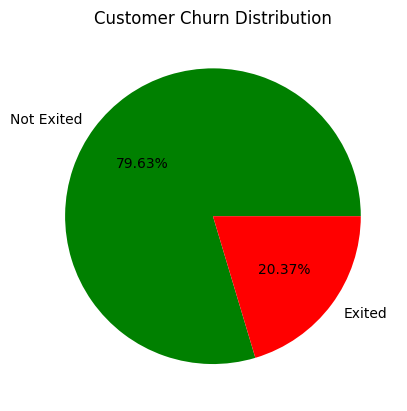

In [9]:
# Plot the customer churn distribution
plt.title('Customer Churn Distribution')
plt.pie(data['Exited'].value_counts(),labels = ['Not Exited', 'Exited'],autopct='%.2f%%',colors=['green','red'])
plt.show() 



- **Majority Retained (79.63%)**: This high retention rate suggests effective customer satisfaction and service delivery, indicating fewer reasons for customers to switch banks.

- **Churn Rate (20.37%)**: This significant churn highlights a segment of customers who may be dissatisfied or attracted by competitors’ offers. This rate presents a crucial area for strategic focus.

- **Risk Identification**: With over 20% churn, it’s imperative to explore the underlying causes and segment-specific characteristics. This understanding will guide targeted retention strategies.



## `Statistical Tests for Predictive Churn Model`

### Importance of Z-Test and Chi-Square Test

#### Why We Use the Z-Test
The **Z-test** is used to determine whether there are significant differences between the means of two groups. In the context of a churn analysis:
- **Purpose**: It helps us understand if the behavioral or demographic attributes of customers who exited differ significantly from those who did not. For example, does the average account balance of churned customers differ from that of retained customers?
- **Impact**: Identifying significant differences allows us to pinpoint factors that might influence a customer's decision to leave the bank, which can inform targeted retention strategies.

#### Why We Use the Chi-Square Test
The **Chi-Square test** is essential for analyzing relationships between categorical variables. In our case:
- **Purpose**: It assesses whether there's an association between categorical variables and customer churn. For example, is churn dependent on the customer's categorical attributes like gender or region?
- **Impact**: Understanding these associations can help in crafting personalized marketing and customer engagement strategies to reduce churn.

Both tests are critical in ensuring that the factors included in our churn prediction models are statistically significant, thereby increasing the reliability and accuracy of our predictions. These insights not only guide strategic business decisions but also enhance our understanding of customer behavior.


In [10]:
import numpy as np
from scipy.stats import norm, chi2_contingency
import pandas as pd

def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    # Calculate the pooled standard error for two independent samples
    pooledSE = np.sqrt(sd1**2/n1 + sd2**2/n2)
    # Compute the Z-statistic
    z = ((X1 - X2) - mudiff) / pooledSE
    # Calculate the p-value from the Z-statistic
    pval = 2 * (1 - norm.cdf(abs(z)))
    # Return the Z-statistic rounded to three decimals and the p-value
    return round(z, 3), pval

def z_test(column):
    # Calculate means and standard deviations for two groups
    more_mean = data.loc[data['Exited'] == 0, column].mean()
    less_mean = data.loc[data['Exited'] == 1, column].mean()
    more_std = data.loc[data['Exited'] == 0, column].std()
    less_std = data.loc[data['Exited'] == 1, column].std()
    # Count the number of samples in each group
    no_of_more = data.loc[data['Exited'] == 0, column].count()
    no_of_less = data.loc[data['Exited'] == 1, column].count()

    # Perform Z-test using the stats from above
    z, p = twoSampZ(more_mean, less_mean, 0, more_std, less_std, no_of_more, no_of_less)
    # H0: There is no difference between the means of the two exit groups.
    # H1: There is a difference between the means of the two exit groups.
    # Output results based on the p-value
    if p < 0.05:
        print("we reject null hypothesis")
        print(f"There is a significant difference between the mean {column} of exit groups.")
        print(f"P-Value: {p: .5f}")
    else:
        print("we accept null hypothesis")
        print(f"There is no significant difference between the mean {column} of exit groups")

def chi_test(column):
    # Perform Chi-square test for independence
    chi2_stat, p, dof, expected = chi2_contingency(pd.crosstab(data[column], data['Exited']))
    
    # H0: There is no association between the column and customer exit status.
    # H1: There is an association between the column and customer exit status.
    # Print the test result details
    print(f"chi2 statistic:     {chi2_stat:.6g}")
    print(f"p-value:            {p}")
    print(f"degrees of freedom: {dof}")
    print("expected frequencies:\n", expected)
    
    # Determine whether to accept or reject the null hypothesis
    if p <= 0.05:
        print("Reject Null Hypothesis")
        print(f"There is a significant association between {column} and Exit.")
    else:
        print("Accept Null Hypothesis there is no association")


## `Categorical Variable`

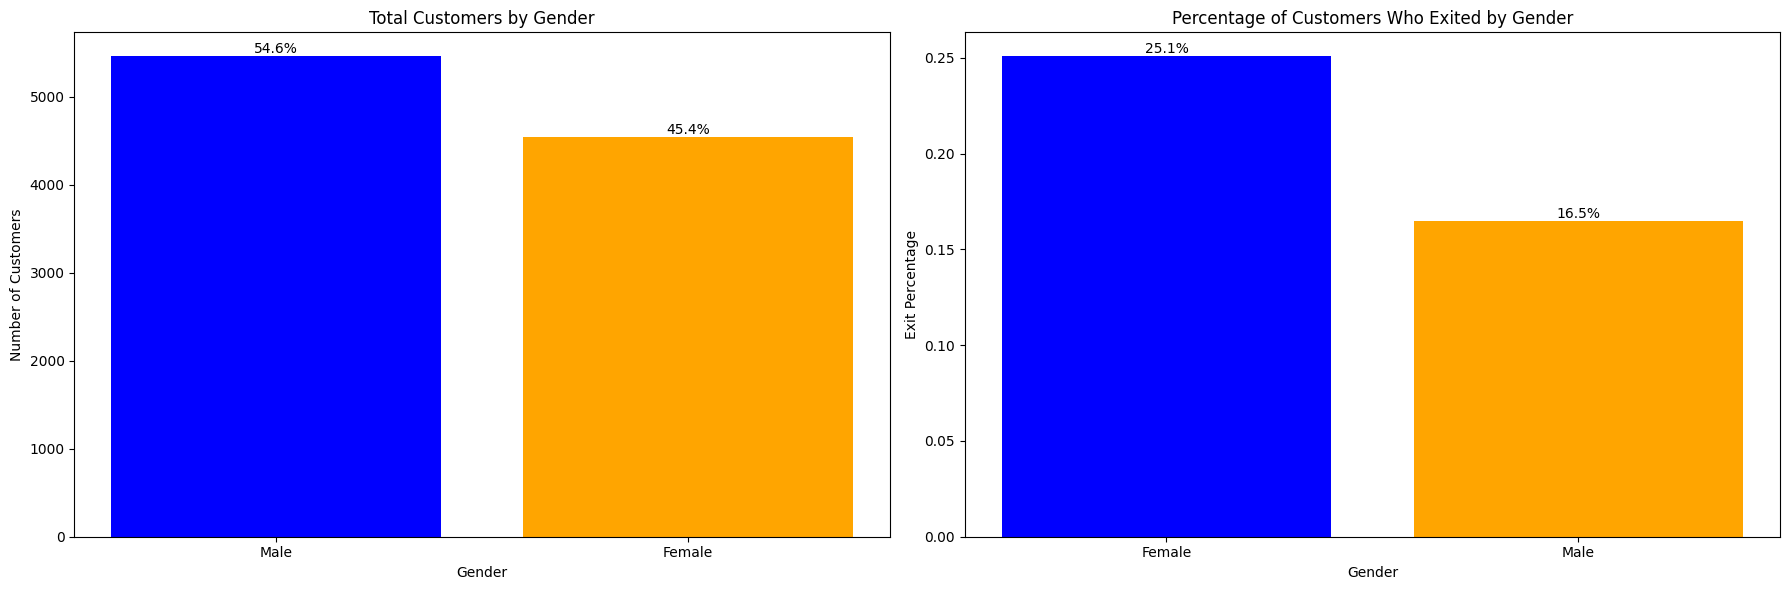

        Not Churned  Churned  Total Customers
Gender                                       
Female         3404     1139             4543
Male           4559      898             5457
Total          7963     2037            10000


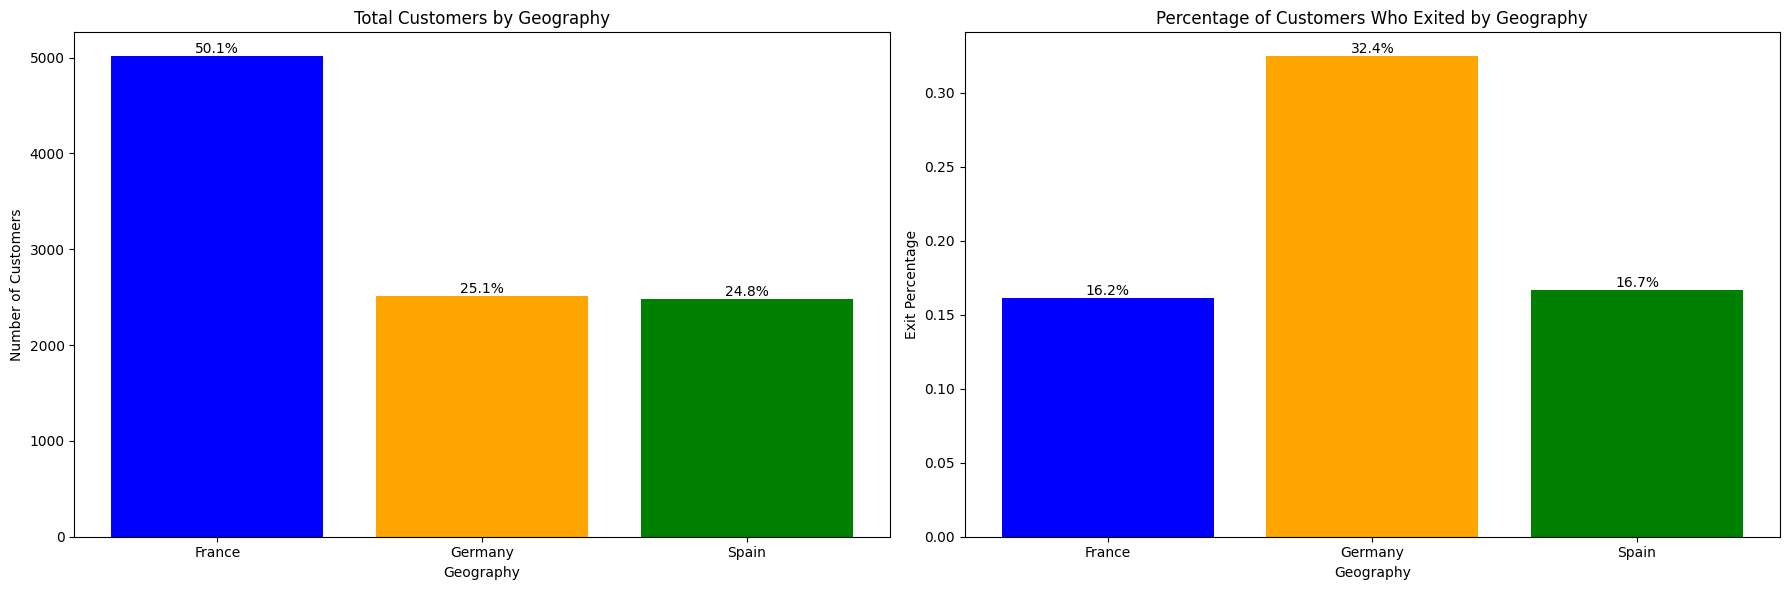

           Not Churned  Churned  Total Customers
Geography                                       
France            4204      810             5014
Germany           1695      814             2509
Spain             2064      413             2477
Total             7963     2037            10000


In [11]:
def plot_categorical_customer_distribution(data, categorical_columns):
    for column in categorical_columns:
        # Ensure the column is categorical
        if data[column].dtype == 'object' or len(data[column].unique()) < 10:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

            # Plot 1: Total number of customers by category
            total_counts = data[column].value_counts()
            ax1.bar(total_counts.index, total_counts.values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'][:len(total_counts.index)])
            ax1.set_title(f'Total Customers by {column.capitalize()}')
            ax1.set_xlabel(column.capitalize())
            ax1.set_ylabel('Number of Customers')

            # Annotate percentages above bars in the plot
            for i, v in enumerate(total_counts.values):
                percentage = 100 * v / total_counts.sum()
                ax1.text(i, v, f'{percentage:.1f}%', ha='center', va='bottom')

            # Plot 2: Percentage of customers who exited by category
            exit_rates = data.groupby(column)['Exited'].mean()
            ax2.bar(exit_rates.index, exit_rates.values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'][:len(exit_rates.index)])
            ax2.set_title(f'Percentage of Customers Who Exited by {column.capitalize()}')
            ax2.set_xlabel(column.capitalize())
            ax2.set_ylabel('Exit Percentage')

            # Annotate percentages above bars in the second plot
            for i, v in enumerate(exit_rates.values):
                ax2.text(i, v, f'{v*100:.1f}%', ha='center', va='bottom')

            plt.tight_layout()
            plt.show()

            # Create a crosstab with total customers, not churned, and churned
            crosstab = pd.crosstab(data[column], data['Exited'], margins=True, margins_name="Total")
            crosstab.columns = ['Not Churned', 'Churned', 'Total Customers']
            print(crosstab)

# Usage Example
data = pd.read_csv('churn.csv')  # Load your data
categorical_columns = ['Gender', 'Geography']  # Define your categorical columns
plot_categorical_customer_distribution(data, categorical_columns)



## **1. Customer Distribution by Gender**
### **Total Customers by Gender**
- The **majority of customers are male** (54.6%), while **45.4% are female**.
- This suggests a slightly higher representation of male customers in the dataset.
- The distribution appears **relatively balanced**, with no extreme gender dominance.

### **Customer Churn Rate by Gender**
- **Female customers have a significantly higher churn rate (25.1%) compared to male customers (16.5%)**.
- Despite having fewer total customers, females exhibit a **higher likelihood of exiting the bank**.
- This suggests **potential gender-based factors affecting customer retention**, such as differences in financial behavior, satisfaction levels, or engagement with banking services.

### **Insights from Crosstab**
| Gender | Not Churned | Churned | Total Customers |
|--------|------------|---------|----------------|
| Female | 3,404      | 1,139   | 4,543          |
| Male   | 4,559      | 898     | 5,457          |
| **Total**  | **7,963**   | **2,037**  | **10,000**        |

---

## **2. Customer Distribution by Geography**
### **Total Customers by Geography**
- **France has the highest number of customers (50.1%)**, followed by **Germany (25.1%)** and **Spain (24.8%)**.
- This suggests that the bank has its **largest market share in France**.
- Germany and Spain have almost equal distribution, but much lower than France.

### **Customer Churn Rate by Geography**
- **Germany has the highest churn rate at 32.4%**, **twice as high as France (16.2%)** and Spain (16.7%).
- This means that customers in Germany are more likely to leave the bank.
- France and Spain have similar and lower churn rates, indicating better customer retention in these regions.

### **Insights from Crosstab**
| Geography | Not Churned | Churned | Total Customers |
|-----------|------------|---------|----------------|
| France    | 4,204      | 810     | 5,014          |
| Germany   | 1,695      | 814     | 2,509          |
| Spain     | 2,064      | 413     | 2,477          |
| **Total** | **7,963**   | **2,037**  | **10,000**        |



In [12]:
chi_test('Geography')

chi2 statistic:     301.255
p-value:            3.8303176053541544e-66
degrees of freedom: 2
expected frequencies:
 [[3992.6482 1021.3518]
 [1997.9167  511.0833]
 [1972.4351  504.5649]]
Reject Null Hypothesis
There is a significant association between Geography and Exit.


- **Expected Frequencies**:
  - **France**: [3992.6482 (Expected Stay), 1021.3518 (Expected Exit)]
  - **Germany**: [1997.9167 (Expected Stay), 511.0833 (Expected Exit)]
  - **Spain**: [1972.4351 (Expected Stay), 504.5649 (Expected Exit)]

- The extremely low p-value (3.83e-66) from the chi-square test clearly rejects the null hypothesis, indicating a significant association between geography and customer churn. 

- **Model Relevance**: Given these findings, incorporating geography as a feature in predictive modeling for customer churn is crucial. It could help tailor retention strategies more effectively by region.
`Geography feature is important for model building`


In [13]:
chi_test('Gender')  

chi2 statistic:     112.919
p-value:            2.2482100097131755e-26
degrees of freedom: 1
expected frequencies:
 [[3617.5909  925.4091]
 [4345.4091 1111.5909]]
Reject Null Hypothesis
There is a significant association between Gender and Exit.


- **Expected Frequencies**:  
  - **Male**: [4345.4091 (Expected Stay), 1111.5909 (Expected Exit)]  
  - **Female**: [3617.5909 (Expected Stay), 925.4091 (Expected Exit)]  

- The extremely low **p-value (2.24e-26)** from the chi-square test **rejects the null hypothesis**, confirming a **significant association between gender and customer churn**.  

- **Model Relevance**: Given this strong correlation, **gender should be included as a feature in predictive modeling** for customer churn. It can help **identify and address gender-specific retention issues** more effectively.  

`Gender feature is important for model building`


## `Numerical Variable`

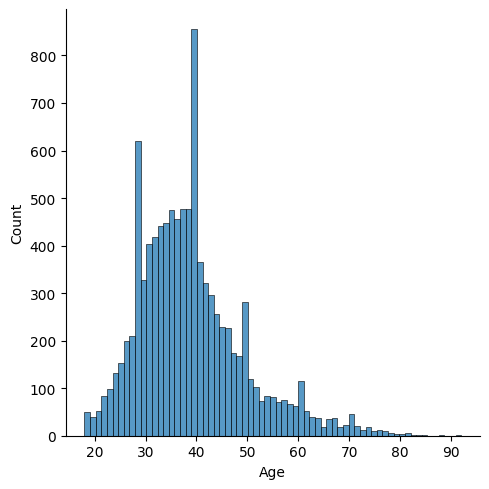

In [14]:
#Plot age distribution
sns.displot(data, x='Age')

- The **majority of customers** are between **30-50 years old**.
- There is a **spike around age 40**, suggesting a concentration of customers in that range.
- Very few customers are **above 60 years old**.
- The distribution is **right-skewed**, indicating **more younger customers** compared to older ones.

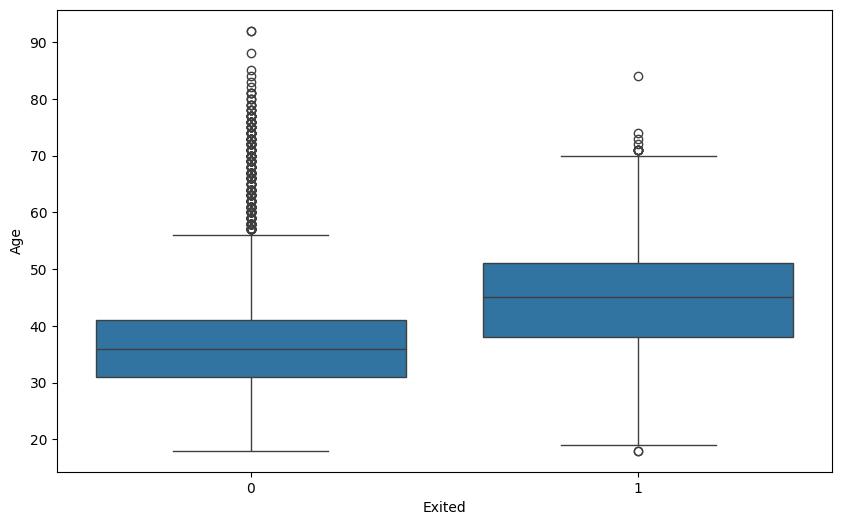

In [15]:
#Plot age distribution by exit status
fig = plt.figure(figsize=(10,6)) 
sns.boxplot(x="Exited", y="Age", data=data)
plt.show()

- **Churned Customers (Exited = 1)** tend to be **older** on average compared to non-churned customers.  
- The **median age** of churned customers is **higher**, indicating that **older individuals are more likely to leave the bank**.  
- The **spread of ages is wider for churned customers**, with some **outliers in the upper age range (above 70-80 years old)**.  
- **Non-churned customers (Exited = 0)** have a **lower median age**, with most falling between **30 and 40 years old**.  
- **Insight:** Age appears to be an **important factor in customer churn**, and **older customers may require targeted retention strategies** to improve loyalty. 🚀


In [16]:
z_test('Age')

we reject null hypothesis
There is a significant difference between the mean Age of exit groups.
P-Value:  0.00000


`Age is important for model building`

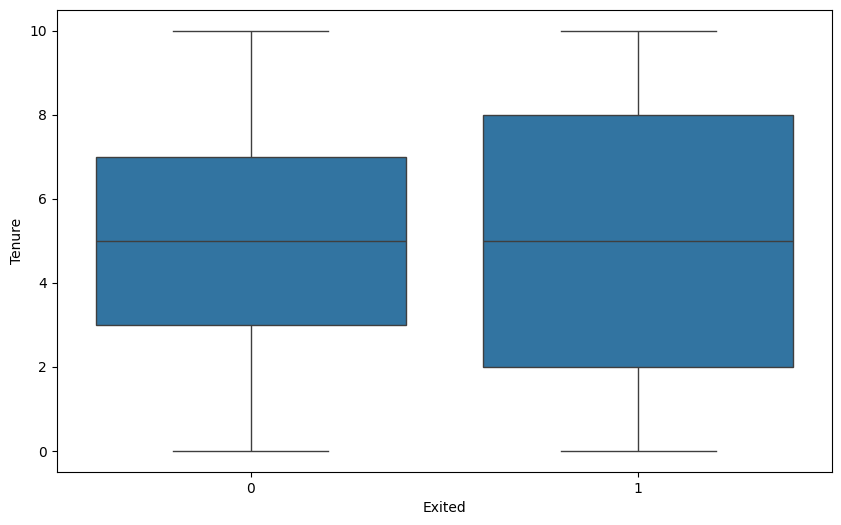

In [17]:
fig = plt.figure(figsize=(10,6)) 
sns.boxplot(x="Exited", y="Tenure", data=data)
plt.show()

- The **median tenure** for both churned (Exited = 1) and non-churned (Exited = 0) customers is **similar**, around **5-6 years**.
- Customers who **churned** tend to have **a slightly higher range of tenure**, extending up to **10 years**.
- The **spread (interquartile range) is wider for churned customers**, suggesting **more variability in tenure** among those who left.
- **No significant difference** in tenure is observed between those who stayed and those who churned.

In [18]:
z_test("Tenure")

we accept null hypothesis
There is no significant difference between the mean Tenure of exit groups


People who exited has stayed longer or for shorter period
Hence, `Tenure is not important for model building`

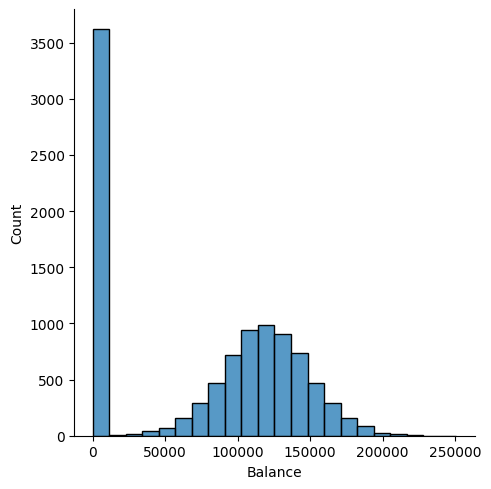

In [19]:
sns.displot(data, x='Balance')

- A **significant number of customers (~35%) have a balance of 0**.
- For non-zero balances, the distribution is **bell-shaped**, peaking around **100,000 - 150,000**.
- Customers with **higher balances (>200,000)** are **less frequent**.

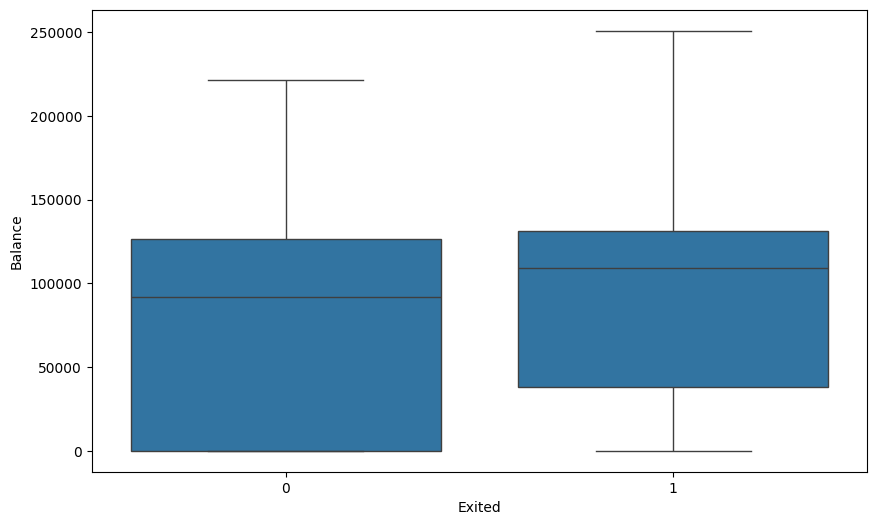

In [20]:
fig = plt.figure(figsize=(10,6)) 
sns.boxplot(x="Exited", y="Balance", data=data)
plt.show()

- The **median balance** of churned customers (**Exited = 1**) is slightly **higher** than non-churned customers.
- Both groups have **similar overall balance ranges**, with some customers having very high balances.
- A **large proportion of non-churned customers have zero balance**, which may indicate **inactive accounts**.

In [21]:
z_test("Balance")

we reject null hypothesis
There is a significant difference between the mean Balance of exit groups.
P-Value:  0.00000


more people with 0 balance have not exited
Hence, `ballance is important for model building`

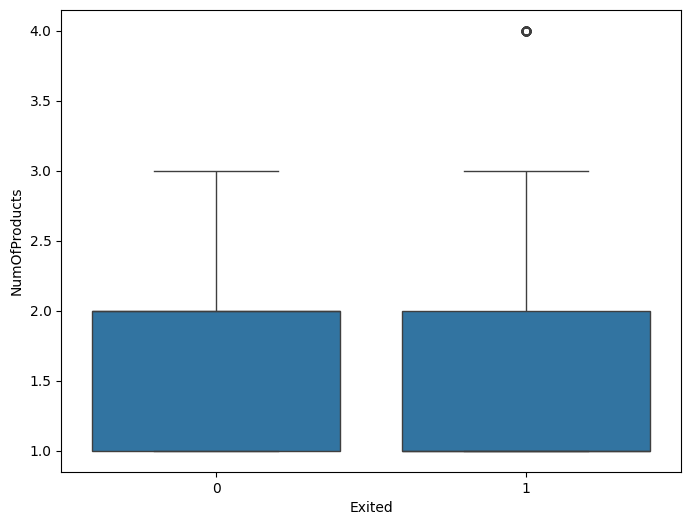

In [22]:
fig = plt.figure(figsize=(8,6)) 
sns.boxplot(x="Exited", y="NumOfProducts", data=data)
plt.show()

- **Most customers** (both churned and non-churned) have **either 1 or 2 products**.
- The **median number of products** is **identical** for both churned and non-churned customers.
- There is **one significant outlier** where a churned customer had **4 products**.

In [23]:
z_test("NumOfProducts")

we reject null hypothesis
There is a significant difference between the mean NumOfProducts of exit groups.
P-Value:  0.00021


Hypothesis testing shows `NumofProducts is also an important feature`

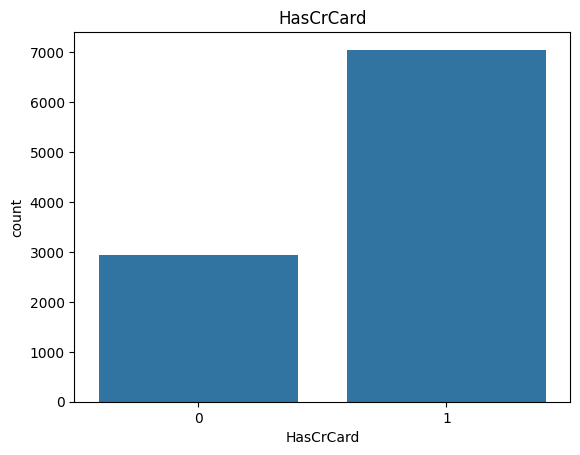

In [24]:
sns.countplot(x=data['HasCrCard'])
plt.title('HasCrCard')
plt.show()

- **Around 70% of customers have a credit card**, while **30% do not**.
- The number of customers **with a credit card is significantly higher** than those without.


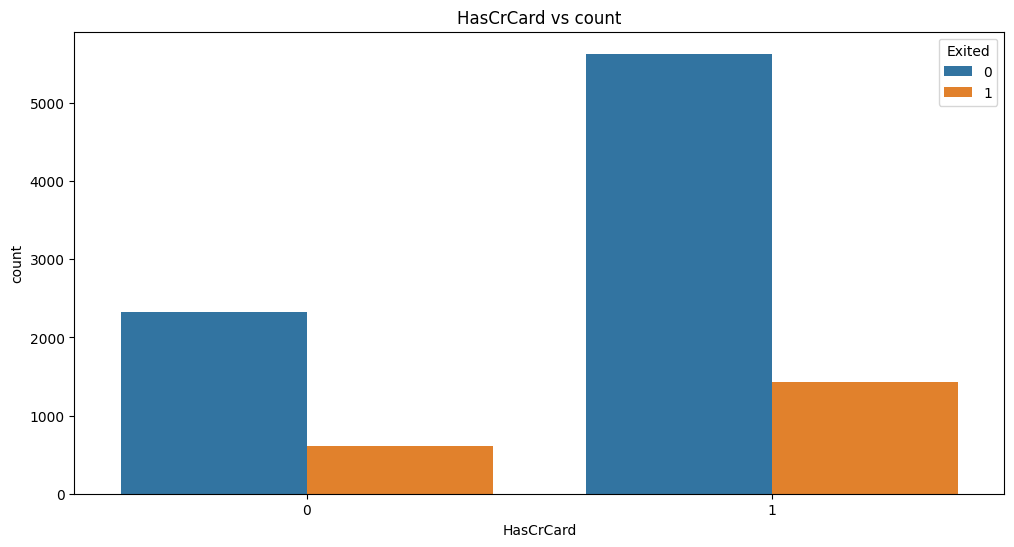

In [25]:
fig = plt.figure(figsize=(12,6)) 
ax = sns.countplot(x="HasCrCard", hue="Exited", data=data).set_title("HasCrCard vs count")

- The majority of **both churned and non-churned customers own a credit card**.
- Customers **without a credit card** have a **lower churn rate** compared to those who have one.
- However, the **difference is not significant**, indicating that credit card ownership **might not be a strong predictor of churn**.  


In [26]:
pd.crosstab(data['HasCrCard'], data['Exited'])

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


In [27]:
chi_test('HasCrCard')

chi2 statistic:     0.471338
p-value:            0.49237236141554697
degrees of freedom: 1
expected frequencies:
 [[2345.1035  599.8965]
 [5617.8965 1437.1035]]
Accept Null Hypothesis there is no association


so, there is no association between Has credit card and exiting, `HasCrCard is not important feature`

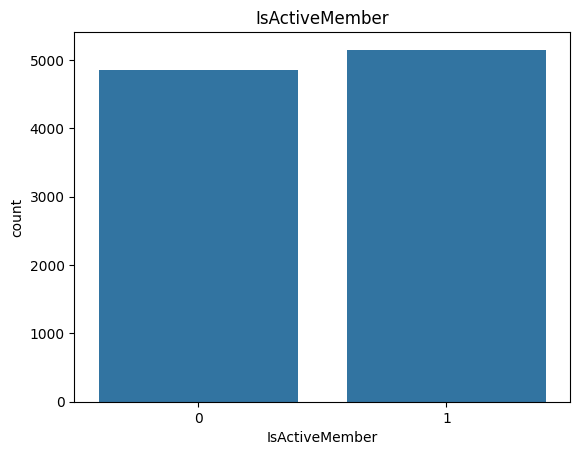

In [28]:
sns.countplot(x=data['IsActiveMember'])
plt.title('IsActiveMember')
plt.show()

- The number of **active and inactive members** is nearly equal.
- A slight majority of customers **are active members**.
- This distribution suggests that **membership activity alone may not be a defining factor for churn**, but it could still influence customer behavior.


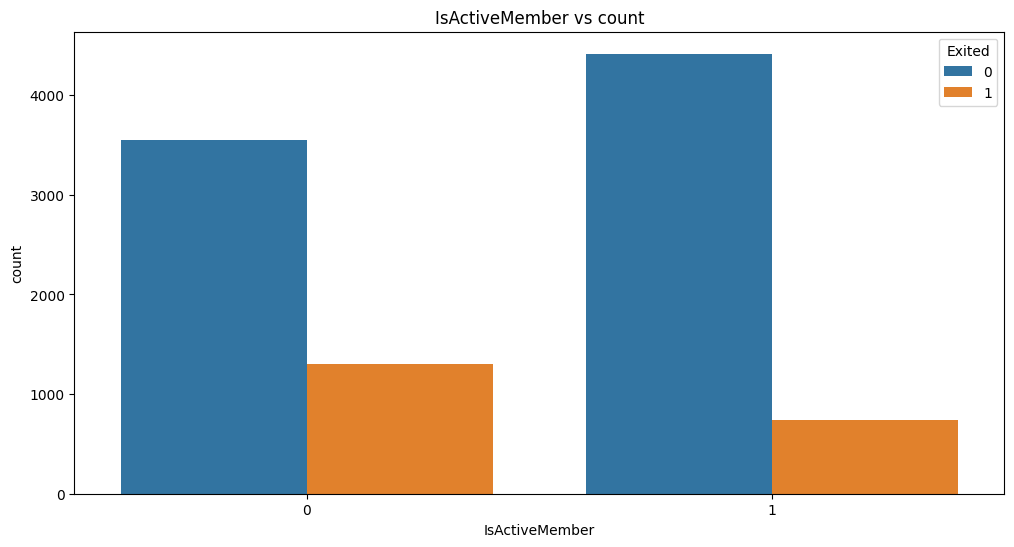

In [29]:
fig = plt.figure(figsize=(12,6)) 
ax = sns.countplot(x="IsActiveMember", hue="Exited", data=data).set_title("IsActiveMember vs count")

- **Inactive members (0) have a higher churn rate** compared to active members (1).  
- While both groups have more non-churners, the churn rate is **significantly higher among inactive members**.  
- **Being an active member appears to be a strong factor in customer retention**.  

In [30]:
pd.crosstab(data['IsActiveMember'], data['Exited'])

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


In [31]:
chi_test('IsActiveMember')

chi2 statistic:     242.985
p-value:            8.785858269303705e-55
degrees of freedom: 1
expected frequencies:
 [[3861.2587  987.7413]
 [4101.7413 1049.2587]]
Reject Null Hypothesis
There is a significant association between IsActiveMember and Exit.


From hypothesis testing we know `IsActiveMember is an important feature`

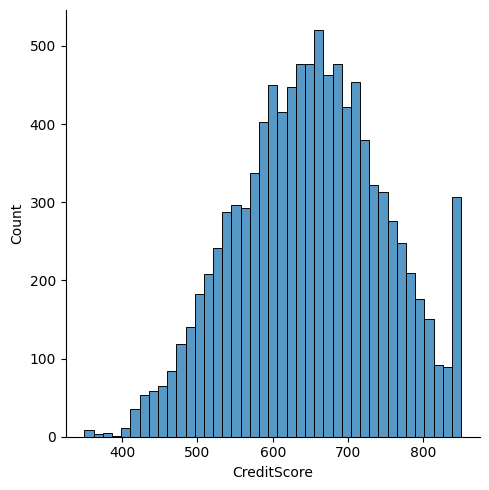

In [32]:
sns.displot(data, x='CreditScore')

- The **majority of customers** have a **credit score between 600 and 750**.  
- The distribution follows a **normal shape**, with a peak around **650-700**.  
- A small group of customers has **very low (<400) or very high (>800) credit scores**.

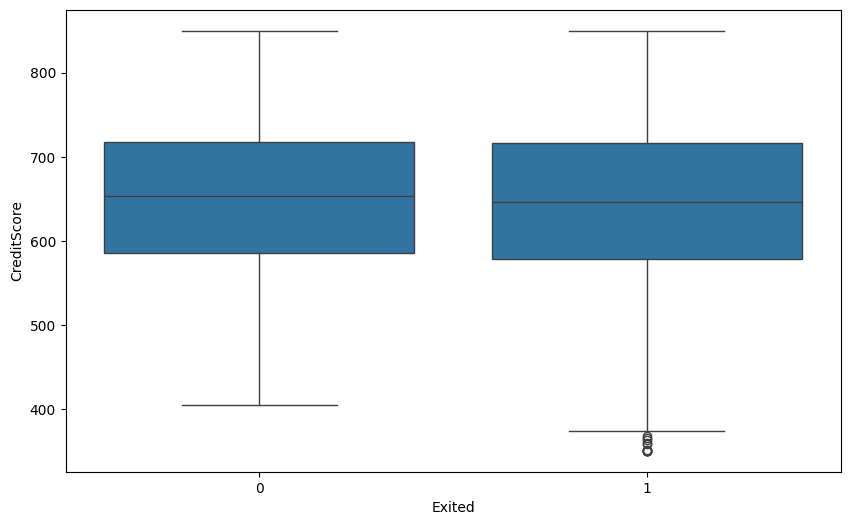

In [33]:
fig = plt.figure(figsize=(10,6)) 
sns.boxplot(x="Exited", y="CreditScore", data=data)
plt.show()

- The **median credit score** is **similar** between customers who **churned (Exited = 1)** and those who stayed (Exited = 0).  
- The **credit score range is wider** for churned customers, with **more outliers** on the lower end.  
- Some churned customers have **very low credit scores (<400)**, which may indicate financial instability.  

Creditscore does not much difference it seems

In [34]:
z_test("CreditScore")

we reject null hypothesis
There is a significant difference between the mean CreditScore of exit groups.
P-Value:  0.00842


`CreditScore is important feature`

In [35]:
#numerical columns
numerikal = data.select_dtypes(include=[np.number])
numerikal.drop(['RowNumber', 'CustomerId'], axis=1, inplace=True)
numerikal

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


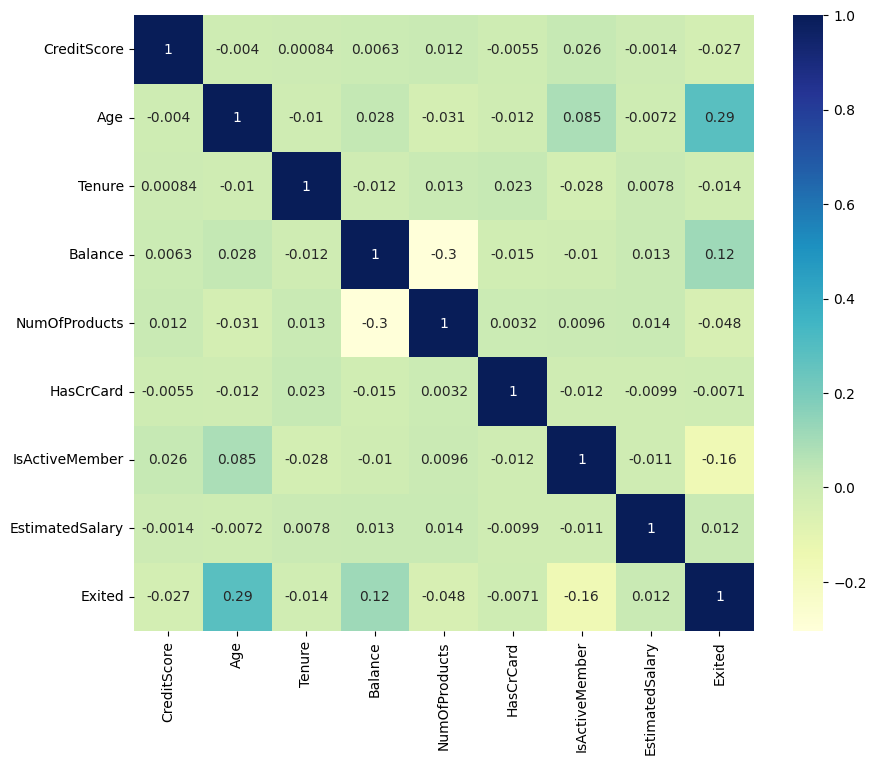

In [36]:
#plot the correlation matrix
plt.rcParams['figure.figsize']=(10,8)
ax = sns.heatmap(numerikal.corr(),annot=True, cmap="YlGnBu")
plt.show()

In [37]:
# print the feature that is correlated with Exited
print(numerikal.corr()['Exited'].sort_values(ascending=False))


Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


# **Correlation Analysis with Customer Churn (`Exited`)**

This table shows **correlation values** between various features and `Exited` (customer churn).  
The **correlation coefficient** ranges from **-1 to 1**:

- **Positive correlation** (closer to **1**) → Feature increases, churn is more likely.  
- **Negative correlation** (closer to **-1**) → Feature increases, churn is less likely.  
- **Near 0 correlation** → No strong relationship with churn.  

## **Key Findings:**
- **Age (0.285)** → **Older customers are more likely to churn.**  
- **Balance (0.118)** → **Higher balance slightly increases churn risk.**  
- **EstimatedSalary (0.012)** → **Almost no impact on churn.**  
- **HasCrCard (-0.007)** → **No significant relationship with churn.**  
- **Tenure (-0.014)** → **Longer tenure slightly reduces churn, but very weak effect.**  
- **CreditScore (-0.027)** → **Better credit score slightly reduces churn, but weak correlation.**  
- **NumOfProducts (-0.047)** → **More products used, lower churn probability.**  
- **IsActiveMember (-0.156)** → **Active members are significantly less likely to churn.**  

### **Recommended Features (Strongest Correlation with Churn)**
✔ **Age** → Has the **strongest positive correlation** with churn.  
✔ **IsActiveMember** → Shows a **moderate negative correlation**, meaning active members are **less likely to churn**.  
✔ **Balance** → While weak, still provides **some insight into customer behavior**.  

### **Less Important Features (Weak Correlation)**
➖ **CreditScore, NumOfProducts, Tenure** → These have very weak correlations but **could still contribute** when combined with other features.  
➖ **EstimatedSalary, HasCrCard** → These **show almost no relationship** with churn and **may not be useful in the model**.  

In [38]:
#Feature selection
X = data[['Geography','Age','Balance','IsActiveMember',
            'Gender','NumOfProducts','CreditScore']]
y = data['Exited']

In [39]:
X.head()

,Geography,Age,Balance,IsActiveMember,Gender,NumOfProducts,CreditScore
0,France,42,0.00,1,Female,1,619
1,Spain,41,83807.86,1,Female,1,608
2,France,42,159660.80,0,Female,3,502
3,France,39,0.00,0,Female,2,699
4,Spain,43,125510.82,1,Female,1,850


In [40]:
#convert gender to dummies using one hot encoding
Gender = pd.get_dummies(X.Gender , prefix='Gender')
Gender = Gender.astype(int)
X = X.join(Gender)
X.drop(['Gender'], axis=1, inplace=True) 



In [ ]:
#convert Geography to dummies
Geography = pd.get_dummies(X.Geography , prefix='Geography')
#convert bool values to int
Geography = Geography.astype(int)#convert bool to int
#join
X = X.join(Geography)
X.drop(['Geography'], axis=1, inplace=True) 

,Geography_France,Geography_Germany,Geography_Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True


In [45]:
X.head()

,Age,Balance,IsActiveMember,NumOfProducts,CreditScore,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,42,0.00,1,1,619,1,0,1,0,0
1,41,83807.86,1,1,608,1,0,0,0,1
2,42,159660.80,0,3,502,1,0,1,0,0
3,39,0.00,0,2,699,1,0,1,0,0
4,43,125510.82,1,1,850,1,0,0,0,1


In [46]:
#Splitting the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
#Using log transformation
X_train_log = np.log1p(X_train)
X_valid_log = np.log1p(X_valid)



## Model

## Logistic Regression

In [48]:
# Initialize Logistic Regression model with high max_iter for convergence
model_le = LogisticRegression(random_state=42, max_iter=10000)

# Train the model on the training dataset
model_le.fit(X_train_log, y_train)

# Define hyperparameters for GridSearchCV
parameters = {'C': [0.8, 0.9, 1, 1.1, 1.2]}  # Regularization strength (inverse of lambda)

# Using 10-fold cross-validation for model tuning
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # KFold for consistent evaluation
model_le_grid = GridSearchCV(model_le, parameters, cv=kf, verbose=1, n_jobs=-1)  # GridSearch with K-Fold
model_le_grid.fit(X_train_log, y_train)  # Fit the model with hyperparameter tuning

# Print the best hyperparameters found
print('Best parameters:', model_le_grid.best_params_)

# Model performance evaluation using K-Fold Cross Validation
cv_scores = cross_val_score(model_le, X_train_log, y_train, cv=kf)  # Compute cross-validation scores


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'C': 0.8}


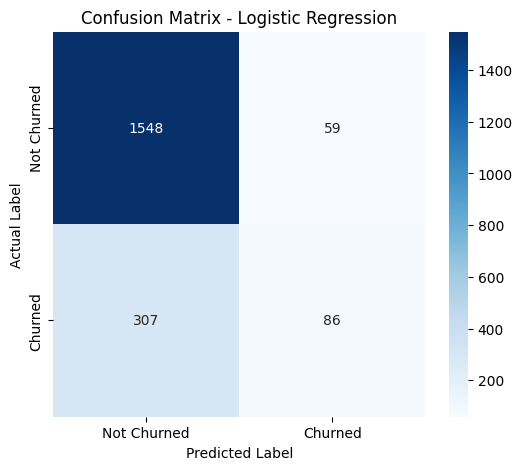

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.59      0.22      0.32       393

    accuracy                           0.82      2000
   macro avg       0.71      0.59      0.61      2000
weighted avg       0.79      0.82      0.78      2000



In [49]:
# Get predictions on validation data
y_pred = model_le_grid.best_estimator_.predict(X_valid_log)

# Compute confusion matrix
cm = confusion_matrix(y_valid, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_valid, y_pred))


## Decission Tree

In [50]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples needed to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples needed at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
    'class_weight': ['balanced', 'balanced_subsample'] # Class weights
}

# Setup K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with K-Fold Cross Validation
dt_grid = GridSearchCV(dt_model, param_grid, cv=kf, verbose=1, n_jobs=-1)
dt_grid.fit(X_train_log, y_train)  # Train model

# Print the best hyperparameters
print("Best Parameters for Decision Tree:", dt_grid.best_params_)

# Evaluate model performance
cv_scores = cross_val_score(dt_grid.best_estimator_, X_train_log, y_train, cv=kf)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters for Decision Tree: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


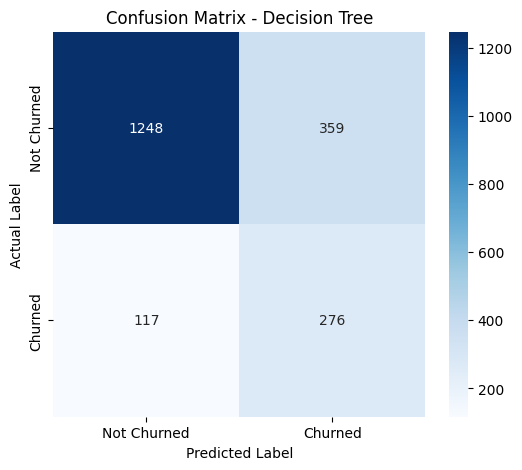

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1607
           1       0.43      0.70      0.54       393

    accuracy                           0.76      2000
   macro avg       0.67      0.74      0.69      2000
weighted avg       0.82      0.76      0.78      2000



In [51]:
# Get predictions on validation data
y_pred_dt = dt_grid.best_estimator_.predict(X_valid_log)

# Compute confusion matrix
cm_dt = confusion_matrix(y_valid, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_valid, y_pred_dt))


## XGB

Fitting 5 folds for each of 81 candidates, totalling 405 fits
🔹 Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 2}

📌 Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1607
           1       0.64      0.64      0.64       393

    accuracy                           0.86      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.86      0.86      0.86      2000



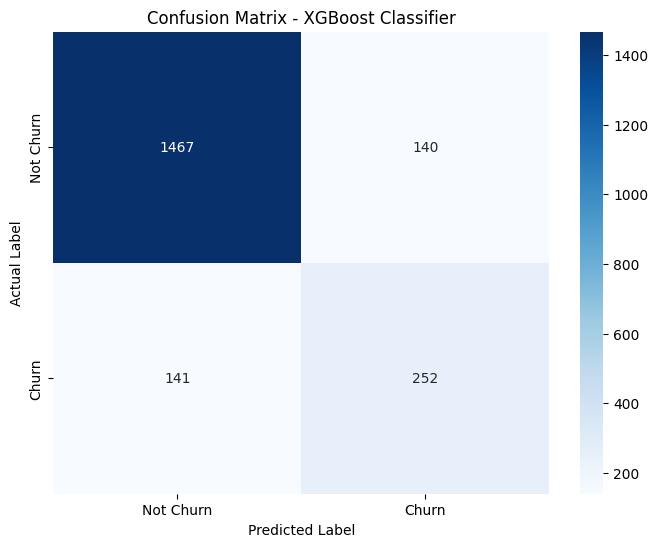

🔹 AUC Score for XGBoost: 0.8726


In [52]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define the XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'scale_pos_weight': [1, 2, 5]  # Adjusts weight of minority class
}

# Grid Search with 5-fold cross-validation
xgb_grid = GridSearchCV(xgb, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_log, y_train)

# Best parameters from GridSearch
best_xgb = xgb_grid.best_estimator_
print("🔹 Best Parameters for XGBoost:", xgb_grid.best_params_)

# Predict on validation set
y_pred_xgb = best_xgb.predict(X_valid_log)
y_probs_xgb = best_xgb.predict_proba(X_valid_log)[:, 1]  # Probability predictions for ROC curve

# Print classification report
print("\n📌 Classification Report for XGBoost Classifier:")
print(classification_report(y_valid, y_pred_xgb))

# Compute confusion matrix
cm_xgb = confusion_matrix(y_valid, y_pred_xgb)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - XGBoost Classifier")
plt.show()

# Compute AUC score
auc_score_xgb = roc_auc_score(y_valid, y_probs_xgb)
print(f"🔹 AUC Score for XGBoost: {auc_score_xgb:.4f}")


## Random Forest

In [53]:
rfc = RandomForestClassifier()


In [54]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at leaf node
    'class_weight': ['balanced', 'balanced_subsample'] # Class weights
}

# Setup K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with K-Fold Cross Validation
rf_grid = GridSearchCV(rf_model, param_grid, cv=kf, verbose=1, n_jobs=-1)
rf_grid.fit(X_train_log, y_train)  # Train model

# Print the best hyperparameters
print("Best Parameters for Random Forest:", rf_grid.best_params_)

# Evaluate model performance
cv_scores = cross_val_score(rf_grid.best_estimator_, X_train_log, y_train, cv=kf)

print(f"Random Forest Train Score: {rf_grid.best_estimator_.score(X_train_log, y_train) * 100:.2f}%")
print(f"Random Forest Cross-Validation Score (Mean Accuracy): {cv_scores.mean() * 100:.2f}%")
print(f"Random Forest Cross-Validation Standard Deviation: {cv_scores.std() * 100:.2f}%")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters for Random Forest: {'class_weight': 'balanced_subsample', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Train Score: 99.98%
Random Forest Cross-Validation Score (Mean Accuracy): 85.66%
Random Forest Cross-Validation Standard Deviation: 0.87%


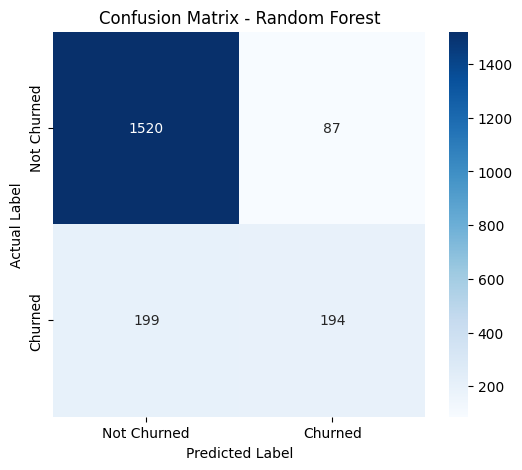

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.69      0.49      0.58       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [55]:
# Get predictions on validation data
y_pred_rf = rf_grid.best_estimator_.predict(X_valid_log)

# Compute confusion matrix
cm_rf = confusion_matrix(y_valid, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_valid, y_pred_rf))



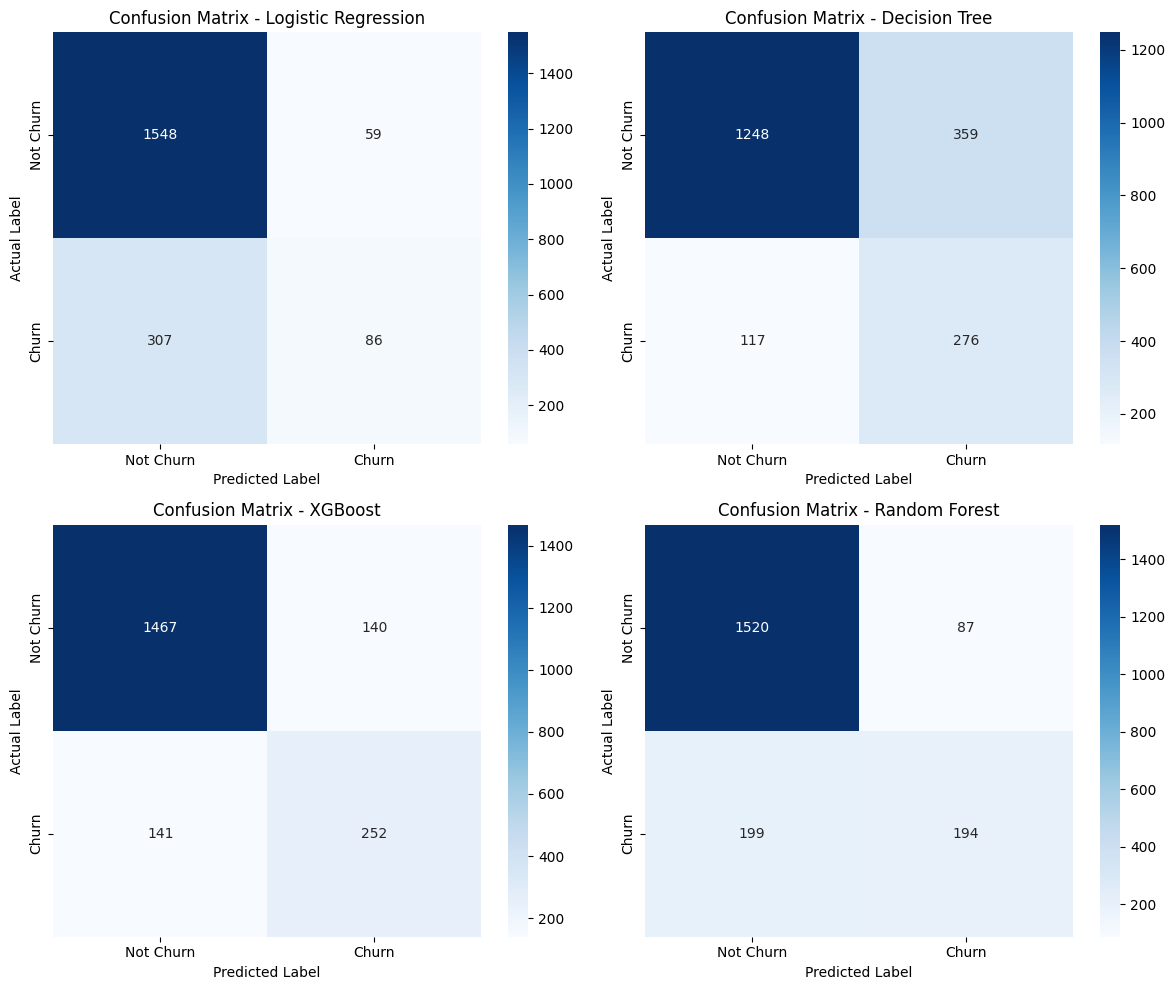

,TP (True Positive),FP (False Positive),FN (False Negative),TN (True Negative),Accuracy (%),Precision (%),Recall (%),F1-Score (%)
Model,,,,,,,,
Logistic Regression,86,59,307,1548,81.70,59.31,21.88,31.97
Decision Tree,276,359,117,1248,76.20,43.46,70.23,53.70
XGBoost,252,140,141,1467,85.95,64.29,64.12,64.20
Random Forest,194,87,199,1520,85.70,69.04,49.36,57.57


In [56]:
# Generate confusion matrices for each model
models = {
    "Logistic Regression": model_le_grid.best_estimator_,
    "Decision Tree": dt_grid.best_estimator_,
    "XGBoost": xgb_grid.best_estimator_,
    "Random Forest": rf_grid.best_estimator_
}

# Initialize dictionary for storing confusion matrix values and performance metrics
confusion_matrices = {
    "Model": [],
    "TP (True Positive)": [],
    "FP (False Positive)": [],
    "FN (False Negative)": [],
    "TN (True Negative)": [],
    "Accuracy (%)": [],
    "Precision (%)": [],
    "Recall (%)": [],
    "F1-Score (%)": []
}

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_valid_log)
    cm = confusion_matrix(y_valid, y_pred)
    report = classification_report(y_valid, y_pred, output_dict=True)
    
    # Extract confusion matrix values
    tn, fp, fn, tp = cm.ravel()
    
    # Store values in dictionary
    confusion_matrices["Model"].append(name)
    confusion_matrices["TN (True Negative)"].append(tn)
    confusion_matrices["FP (False Positive)"].append(fp)
    confusion_matrices["FN (False Negative)"].append(fn)
    confusion_matrices["TP (True Positive)"].append(tp)
    confusion_matrices["Accuracy (%)"].append(round(accuracy_score(y_valid, y_pred) * 100, 2))
    confusion_matrices["Precision (%)"].append(round(report['1']["precision"] * 100, 2))
    confusion_matrices["Recall (%)"].append(round(report['1']["recall"] * 100, 2))
    confusion_matrices["F1-Score (%)"].append(round(report['1']["f1-score"] * 100, 2))
    
    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"], ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted Label")
    axes[idx].set_ylabel("Actual Label")

plt.tight_layout()
plt.show()

# Convert dictionary to DataFrame for better visualization
confusion_df = pd.DataFrame(confusion_matrices)
confusion_df.set_index("Model", inplace=True)
confusion_df



## ✅ **Chosen Model: Random Forest**
### 🔹 **Why Random Forest?**
✔ **High Accuracy (85.70%)** → Well-balanced performance.  
✔ **Strong Precision (69.04%)** → Reliable in predicting churned customers.  
✔ **Balanced Recall (49.36%)** → Captures a reasonable amount of churn cases.  
✔ **Overall F1-Score (57.57%)** → A good trade-off between precision and recall.  

### 🔹 **Key Takeaways**
- **Logistic Regression** has **high accuracy** but struggles with recall (low ability to detect churners).  
- **Decision Tree** has **better recall** but suffers from low precision, meaning **too many false positives**.  
- **XGBoost** has a **better balance** but slightly lower precision than Random Forest.  
- **Random Forest** **outperforms in precision and accuracy**, making it the best choice for **identifying potential churners while minimizing false positives**.

In [57]:
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_valid)

In [58]:
# Assuming y_valid is your actual labels and y_pred_rfc is the predictions from the RandomForest model
accuracy = accuracy_score(y_valid, y_pred_rfc) * 100
y_probs_rfc = rfc.predict_proba(X_valid)[:, 1]
auc_score = roc_auc_score(y_valid, y_probs_rfc)  # Ensure you use probability scores for AUC
precision = precision_score(y_valid, y_pred_rfc)
recall = recall_score(y_valid, y_pred_rfc)

# Print the accuracy, AUC score, precision, and recall
print("Test accuracy for Random forest classifier:", f"{accuracy:.2f}%")
print("AUC score for Random forest classifier:", auc_score)
print("Precision for Random forest classifier:", precision)
print("Recall for Random forest classifier:", recall)


Test accuracy for Random forest classifier: 85.80%
AUC score for Random forest classifier: 0.8509716554957557
Precision for Random forest classifier: 0.6885813148788927
Recall for Random forest classifier: 0.5063613231552163


## `Let's Do hyperparameter tuning for Random Forest`

In [59]:
my_dict = dict()
for i,j in zip(X.columns, rfc.feature_importances_):
    my_dict[i]=j

In [60]:
my_dict = dict(sorted(my_dict.items(), key=lambda item: item[1]))

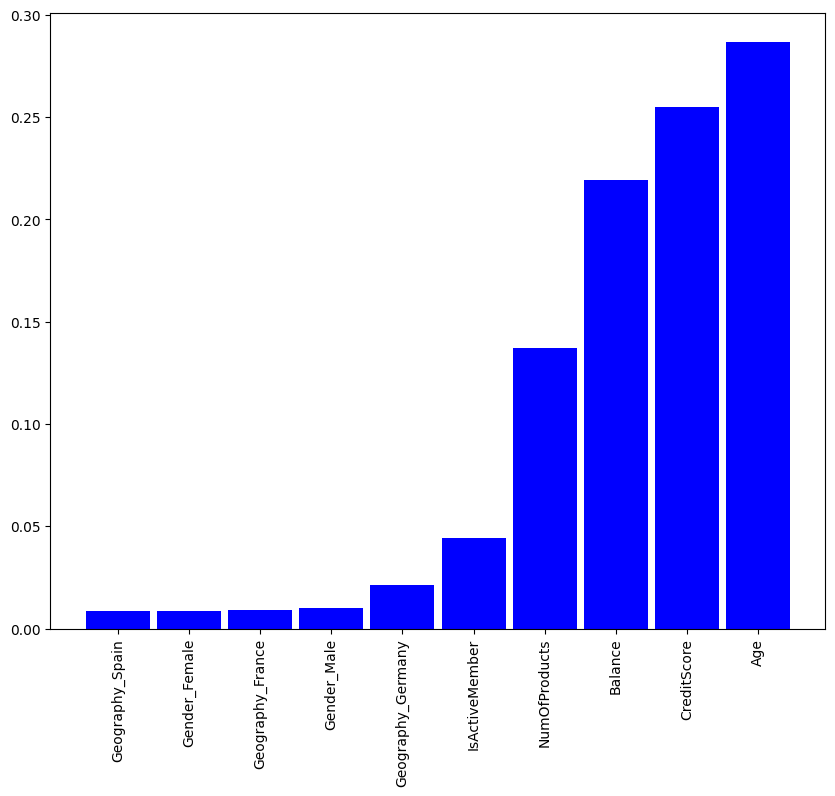

In [61]:
keys= list(my_dict.keys())
values= list(my_dict.values())
plt.bar(keys,values , color ='blue',
        width = 0.9)
plt.xticks(rotation=90)
plt.show()

# 🔍 Feature Importance in Churn Prediction

## 📊 **Key Features Influencing Churn**
The bar chart visualizes the importance of different features in predicting customer churn using **Random Forest**.

### 🔹 **Top 3 Most Important Features**
1️⃣ **Age** → **Older customers are more likely to churn.**  
2️⃣ **Credit Score** → Customers with **lower credit scores have a higher churn risk.**  
3️⃣ **Balance** → Customers with **higher account balances are slightly more prone to churn.**  

### 🔹 **Moderate Impact Features**
- **NumProducts** → **More products mean lower churn risk.**  
- **IsActiveMember** → **Active customers are less likely to churn.**  

### 🔹 **Less Influential Features**
- **Geography (Spain, France, Germany)** → **Location has minimal impact on churn.**  
- **Gender** → **Gender does not significantly affect churn probability.**  


In [ ]:
# Define the parameter grid to search across multiple dimensions of hyperparameters
param_grid = {
    'n_estimators': np.arange(50, 101, 50),  # Reduced number of steps
    'max_depth': [None, 10, 20],  # Fewer depth options
    'min_samples_split': [2, 10],  # Fewer options
    'min_samples_leaf': [1, 4],  # Fewer options
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
}

# Initialize the RandomForestClassifier
estimator = RandomForestClassifier(random_state=42)

# Setup GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=estimator,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           n_jobs=4,  # Number of jobs to run in parallel
                           cv=5,  # Number of folds in cross-validation
                           verbose=1)  # Controls the verbosity: the higher, the more messages

# Assuming X and y are your data and labels respectively
# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best ROC AUC score
print("Best Parameters:", best_params)
print("Best ROC AUC Score:", best_score)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best ROC AUC Score: 0.8621475355000605


In [63]:
# Initialize the RandomForestClassifier with the optimized number of estimators
rfc = RandomForestClassifier(max_depth= 10, max_features= 'sqrt', min_samples_leaf= 4, min_samples_split= 2, n_estimators= 100,class_weight='balanced',random_state=42)


In [64]:


# Mendefinisikan KFold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi variabel untuk menyimpan skor
scores = []
conf_matrices = []

# Loop melalui semua folds
for train_index, test_index in kf.split(X_train):
    # Membagi data menjadi train dan validation untuk fold saat ini
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Melatih model pada data training fold
    rfc.fit(X_train_fold, y_train_fold)
    
    # Evaluasi model pada data validation fold
    y_pred_fold = rfc.predict(X_valid_fold)
    
    # Menghitung skor untuk fold ini dan menyimpannya
    report = classification_report(y_valid_fold, y_pred_fold)
    cm = confusion_matrix(y_valid_fold, y_pred_fold)
    scores.append(report)
    conf_matrices.append(cm)

    # Opsional: Tampilkan report per fold
    print("Classification Report for fold:")
    print(report)
    print("Confusion Matrix for fold:")
    print(cm)


Classification Report for fold:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1273
           1       0.58      0.69      0.63       327

    accuracy                           0.83      1600
   macro avg       0.75      0.78      0.76      1600
weighted avg       0.85      0.83      0.84      1600

Confusion Matrix for fold:
[[1110  163]
 [ 101  226]]
Classification Report for fold:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1253
           1       0.59      0.64      0.61       347

    accuracy                           0.83      1600
   macro avg       0.74      0.76      0.75      1600
weighted avg       0.83      0.83      0.83      1600

Confusion Matrix for fold:
[[1100  153]
 [ 126  221]]
Classification Report for fold:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1277
           1       0.58      0.70

In [ ]:
# mean of the confusion matrix
mean_conf_matrix = np.mean(conf_matrices, axis=0)
print("Rata-Rata Confusion Matrix:")
print(mean_conf_matrix)


Rata-Rata Confusion Matrix:
[[1108.2  163. ]
 [ 110.   218.8]]



1️⃣ **High True Negative (1108.2 avg)** → The models are **good at identifying customers who will stay**.  
2️⃣ **Moderate True Positive (218.8 avg)** → The models can detect churners but with some **misclassifications**.  
3️⃣ **False Positive Rate (163 avg)** → Some **non-churning customers are incorrectly predicted as churners**, which may impact customer experience.  
4️⃣ **False Negative Rate (110 avg)** → Some churners are **missed**, indicating potential room for improvement in recall.  


In [66]:
# Melatih model pada seluruh data training
rfc.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, random_state=42)

In [67]:
from sklearn.metrics import precision_recall_curve, f1_score

# Get predicted probabilities for churn (class 1)
y_pred_prob_rfc = rfc.predict_proba(X_valid)[:, 1]

# Get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_valid, y_pred_prob_rfc)

# Compute F1 scores for each threshold
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])

# Find the threshold that maximizes **Recall first**, then balances with F1-score
best_recall_index = recall.argmax()  # Maximum Recall
best_recall_threshold = thresholds[best_recall_index]

# Find the best trade-off point where both Recall & F1-score are relatively high
best_f1_index = f1_scores.argmax()
best_f1_threshold = thresholds[best_f1_index]

print(f"🔹 **Threshold Maximizing Recall:** {best_recall_threshold:.2f}")
print(f"🔹 **Best Balanced Threshold (Recall & F1-Score):** {best_f1_threshold:.2f}")


🔹 **Threshold Maximizing Recall:** 0.01
🔹 **Best Balanced Threshold (Recall & F1-Score):** 0.59


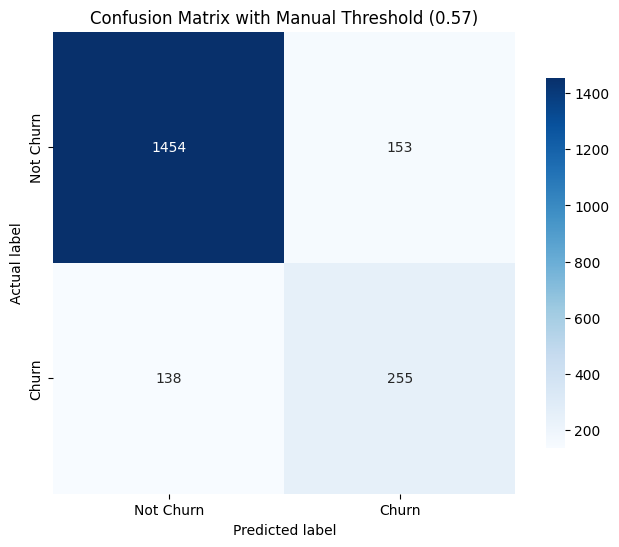

Classification Report for RandomForest Classifier (With Manual Threshold 0.57):
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1607
           1       0.62      0.65      0.64       393

    accuracy                           0.85      2000
   macro avg       0.77      0.78      0.77      2000
weighted avg       0.86      0.85      0.86      2000



In [ ]:
# Manually set the threshold value
threshold = 0.57  # Adjust this value as needed

# Convert probabilities to class predictions using the manually set threshold
y_pred_rfc = (y_pred_prob_rfc >= threshold).astype(int)

# Generate updated classification report and confusion matrix
report_manual = classification_report(y_valid, y_pred_rfc)
cm_manual = confusion_matrix(y_valid, y_pred_rfc)

# Plot updated confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_manual, annot=True, fmt='d', cmap='Blues', square=True, cbar_kws={'shrink': .8})

# Add labels
plt.ylabel('Actual label')
plt.xlabel('Predicted label')   
plt.title(f'Confusion Matrix with Manual Threshold ({threshold})')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Churn', 'Churn'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Churn', 'Churn'], va='center')

# Show the plot
plt.show()

# Print the classification report
print(f"Classification Report for RandomForest Classifier (With Manual Threshold {threshold}):")
print(report_manual)


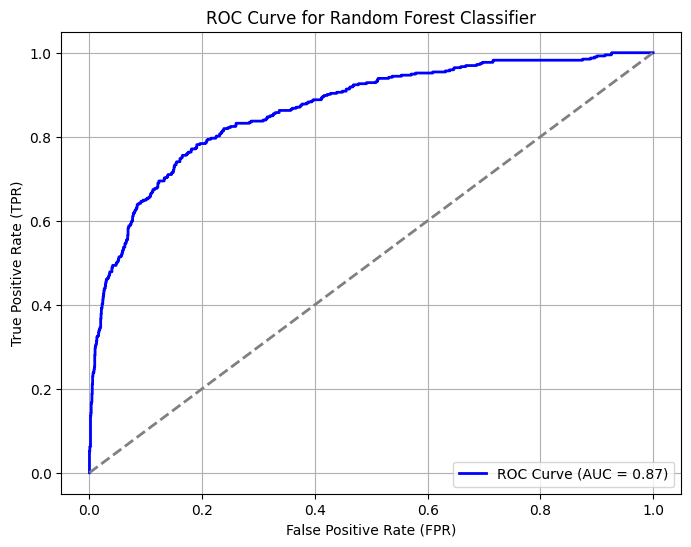

In [69]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC for Random Forest
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_prob_rfc)  # Ensure y_pred_prob_rfc contains predicted probabilities
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line for random guess

# Formatting the plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid()

# Show the plot
plt.show()



1️⃣ **AUC Score = 0.87** → The model has **good discriminatory power** in distinguishing churners from non-churners.  
2️⃣ **Higher Curve Above Diagonal** → The classifier performs **better than a random guess** at most thresholds.  
3️⃣ **Steep Initial Rise** → The model correctly classifies a large proportion of positives **early**, meaning **strong recall performance**.  


In [70]:
# Assuming X_train and X_test are available after reloading your dataset
data_testing_for_RF_model = pd.concat([X_train, X_valid], axis=0)

# Display the first few rows of the combined dataset
print(data_testing_for_RF_model.head())


      Age    Balance  IsActiveMember  NumOfProducts  CreditScore  \
9254   32       0.00               1              2          686   
1561   42  119624.60               1              2          632   
1670   24  114739.92               0              1          559   
6087   27  135637.00               0              1          561   
6669   56  142147.32               0              1          517   

      Gender_Female  Gender_Male  Geography_France  Geography_Germany  \
9254              0            1                 1                  0   
1561              0            1                 0                  1   
1670              0            1                 0                  0   
6087              1            0                 1                  0   
6669              0            1                 1                  0   

      Geography_Spain  
9254                0  
1561                0  
1670                1  
6087                0  
6669                0  


In [71]:
y_probs = rfc.predict_proba(data_testing_for_RF_model)[:, 1]  # Change to the correct model if needed
# Assign churn risk segments based on improved probability bins
data_testing_for_RF_model['Churn_Segment'] = pd.cut(
    y_probs, 
    bins=[0, 0.15, 0.35, 0.65, 0.85, 1],  # Adjusted bins based on distribution
    right=False, 
    labels=['Very Low Risk', 'Low Risk', 'Medium Risk', 'High Risk', 'Very High Risk']
)

# Display sample results
print(data_testing_for_RF_model[['Churn_Segment']].head())


       Churn_Segment
9254   Very Low Risk
1561        Low Risk
1670     Medium Risk
6087        Low Risk
6669  Very High Risk


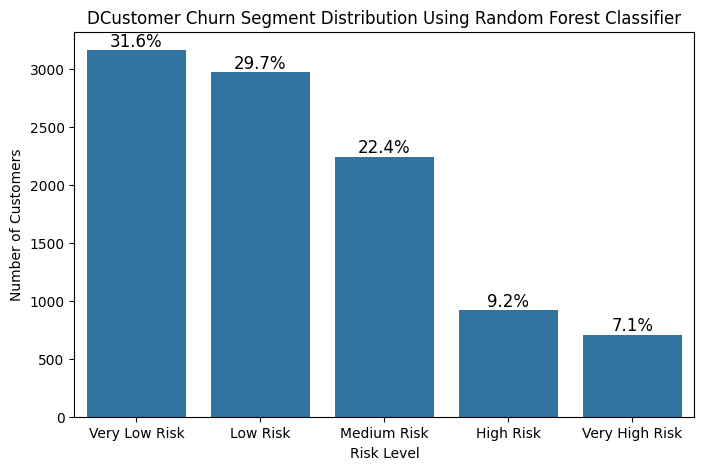

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Churn_Segment exists and convert to string
if 'Churn_Segment' in data_testing_for_RF_model.columns:
    data_testing_for_RF_model['Churn_Segment'] = data_testing_for_RF_model['Churn_Segment'].astype(str)

    # Count values and normalize for percentages
    churn_counts = data_testing_for_RF_model['Churn_Segment'].value_counts()
    churn_percentages = (churn_counts / churn_counts.sum()) * 100  # Convert to percentage
    order = ['Very Low Risk', 'Low Risk', 'Medium Risk', 'High Risk', 'Very High Risk']  # Define order

    # Plot the churn segment distribution
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x=churn_counts.index, y=churn_counts.values, order=order)

    # Annotate each bar with percentage
    for p, label in zip(ax.patches, order):
        height = p.get_height()
        percentage = churn_percentages[label]  # Get percentage from count data
        
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=12, color='black')

    plt.title('DCustomer Churn Segment Distribution Using Random Forest Classifier')
    plt.xlabel('Risk Level')
    plt.ylabel('Number of Customers')
    plt.show()
else:
    print("Error: Column 'Churn_Segment' not found in data_testing_for_RF_model.")


In [73]:
data_testing_for_RF_model['Churn_Segment'].value_counts()

Churn_Segment
Very Low Risk     3162
Low Risk          2969
Medium Risk       2241
High Risk          920
Very High Risk     708
Name: count, dtype: int64

# 📌 Insights & Action Plan from Churn Prediction using Random Forest  

## 🔹 Summary of Churn Segmentation Results  
The **Random Forest** model has categorized customers into different churn risk segments based on their **probability of leaving**.  

| **Churn Segment**  | **Number of Customers** | **Percentage** |
|--------------------|------------------------|---------------|
| **Very Low Risk**  | 3,162 | 31.6% |
| **Low Risk**       | 2,969 | 29.7% |
| **Medium Risk**    | 2,241 | 22.4% |
| **High Risk**      | 920  | 9.2% |
| **Very High Risk** | 708  | 7.1% |

### **Key Insights**  
1️⃣ **~61.3% of customers are in the "Very Low Risk" and "Low Risk" segments.**  
   - These customers are **satisfied and loyal**.  
   - The bank needs to **maintain engagement** to keep them loyal.  

2️⃣ **22.4% of customers are in the "Medium Risk" category.**  
   - They have a **moderate chance of leaving**.  
   - They might **lack engagement or face minor issues** with services.  

3️⃣ **16.3% of customers are in the "High Risk" & "Very High Risk" segments.**  
   - These **1,628 customers are at serious risk of churning**.  
   - They need **urgent intervention** to prevent them from leaving.  

---

## 🚀 Action Plan for Retention & Customer Engagement  
### ✅ **1️⃣ Strategy for Low-Risk Customers (61.3%)**  
**💡 Objective:** Keep them engaged & satisfied to **prevent future churn**.  

✔ **Loyalty Perks:** Exclusive discounts, higher interest savings, or cashback on transactions.  
✔ **Personalized Banking Services:** AI-driven recommendations for better savings & investment options.  
✔ **Referral & Upselling Programs:** Offer incentives for referring new customers or upgrading accounts.  

---

### ✅ **2️⃣ Strategy for Medium-Risk Customers (22.4%)**  
**💡 Objective:** Reduce churn likelihood by **addressing dissatisfaction early**.  

✔ **Proactive Customer Support:** Identify **transaction patterns** and **contact them before issues escalate**.  
✔ **Targeted Offers:** Adjust loan rates, waive small fees, or provide flexible repayment plans.  
✔ **Better Communication:** Send personalized messages or assign relationship managers for **better banking guidance**.  

---

### ✅ **3️⃣ Strategy for High-Risk Customers (16.3%)**  
**💡 Objective:** **Urgent retention efforts** to prevent churn & keep revenue stable.  

✔ **Immediate Personalized Outreach:** Directly **call or email customers** with customized retention offers.  
✔ **Special Retention Packages:** Provide **fee reductions, better loan rates, or priority support**.  
✔ **Exit Survey for Churners:** If they leave, **capture the reasons** to refine future retention strategies.  

---

## 📊 Business Impact of Implementation  
✔ **Reducing churn in high-risk segments by even 10-15%** → **Significant revenue retention**.  
✔ **Stronger customer satisfaction & loyalty** → **Higher lifetime value** per customer.  
✔ **Cost savings on customer acquisition** → Retaining customers **costs 5x less** than acquiring new ones.  

---
